<a href="https://colab.research.google.com/github/MisterGusMan/Alura_ImersaoDados3/blob/main/Projeto_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução


##1.1 Resumo

Quando o tópico de "*Aprendizado de Máquina*" é mencionado, a maioria das pessoas pensa em super computadores realizando milhares de cálculos por segundo, máquinas trabalhando de maneira autônoma, extensas fórmulas matemáticas, entre outros elementos intimidantes. Entretanto, o aprendizado de máquina ou *Machine Learning* está presente em nosso dia-a-dia mais do que podemos imaginar, seja na área da indústria, finâncias ou até mesmo na medicina.

Tomando a medicina como exemplo, os modelos de ML são essenciais para o processo chamado *Drug Discovery* ou *Descobrimento de Drogas*, onde vários compostos são testados para definir candidatos para novas medicações. Essa é uma das práticas mais antigas da medicina, sendo praticada à mais de 5000 anos. Atualmente, o processo de descobrimento é dividido em 3 partes: **Pesquisa, Desenvolvimento e Aprovação**. Os modelos de ML são primariamente utilizados na pesquisa, para automatizar e otimizar o processo de identificação de novos compostos

Neste projeto será utilizado uma amostra de dados sobre testes de drogas em células, que foi fornecido pela Alura  durante o programa **Imersão Dados 3**. Os dados foram utilizados no desafio do laboratório de inovação e ciência de Harvard e fornecem informações genéricas como quantidade de droga dosada, tempo de dosagem, tipo de droga ou até mesmo informações mais específicas como genes presentes em cada célula, que precisam de um certo dominio na área para tratá-los.



##1.2 Objetivo

Estaremos analisando a **Tuberculose**, uma doença altamente transmissível que afeta os pulmões, causada pela bactéria **Mycobacterium Tuberculosis** ou Bacilo de Koch. Anualmente, cerca de 10 milhões de pessoas contraem Tuberculose, e a doença leva mais de um milhão de pessoas a óbito em todo o mundo. Seu tratamento é realizado principalmente com a **Rifampicina** e seu custo é por volta de 10 dólares americanos (aproximadamente 52 reais). Para reduzir a mortalidade e o custo de produção, novos medicamentos são fabricados e testados constantemente, utilizando o método de descobrimento.

O objetivo deste projeto é analisar os dados de testes, aplicando técnicas de limpeza, exploração e manipulação para definir possíveis relações não triviais entre parâmetros, e ao final gerar um modelo que indentifique novas possíveis substâncias que possam ser utilizadas para o tratamento da Tuberculose.



#2. Carregando os dados

Assim como definido na introdução, nosso **Dataset** apresenta informações gerais e detalhes específicos sobre os compostos. Sendo assim, antes de realizar qualquer modificação ou análise, vamos nos familiarizar com os dados.




##2.1 Importando as bibliotecas

Para importar nossos dados, usaremos a blibioteca **Pandas**, em conjunto com a biblioteca **Numpy** para realizar cálculos mais complexos de forma simples:


In [2]:
import pandas as pd
import numpy as np
# Ignorando mensagens de erros:
import warnings
warnings.filterwarnings('ignore')


##2.2 Importando os dados

Os dados estão disponíveis na página do Github da Alura e podem ser acesados [neste link](https://github.com/alura-cursos/imersaodados3). Eles estão separados em dois datasets, `dados_experimentos` e `dados_resultados`, ligados pela coluna `id`. Para importa-los, usaremos a função **read_csv()** do Pandas, colocando a URL com os dados e alterando o parâmetro compression para 'zip' no dataset dos testes, informando o tipo de arquivo da URL. Então, utilizamos a função **head()** para visualizar 5 primeiras linhas e o método **.shape** para ver o número de linhas e colunas do DataFrame gerado:

In [3]:
dados_teste = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados_teste.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
dados_teste.shape

(23814, 877)

In [5]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
dados_resultados.shape

(23814, 207)

##2.3 Selecionando os dados
A **Rifampicina** é utilizada como tratamento como tuberculose pois ela iníbe o **RNA Polimerase**, impedindo que a bactéria se replique. Sendo assim, olharemos somente para a coluna `rna_polymerase_inhibitor` dos dados de resultado. Utilizando a função **.join()** do pandas, criaremos um novo DF, `dados`, unindo os valores dos testes e resultados seguindo a coluna `id`.

In [7]:
dados = dados_teste.join(dados_resultados['rna_polymerase_inhibitor'])
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0


In [8]:
dados.shape

(23814, 878)


##2.4 Informações adicionais

Podemos ver que temos um grande número de colunas , junto com 772 colunas com nome `g-n` e 100 colunas com `c-n`, que representam cada gene presente na célula e o tipo de célula que a droga foi testada (saudável, cancerígena, célula óssea, célula tronco etc), respectivamente. Sendo assim, podemos ver que somente as colunas `tratamento, tempo, dose e droga` são categóricas (Booleanas), enquanto as demais são colunas númericas contínuas (Float).

Com isso em mente, vamos definir o que cada coluna em nosso DF representa:

    id: Código de identificação do teste;
    tratamento: Teste foi realizado com ou sem droga;
    tempo: Tempo de observação do teste em horas;
    dose: Quantidade da droga utilizada;
    droga: Droga utilizada no tratamento, com o nome anonimizado para evitar vieses;
    g-n's: Quantidade do gene n produzido com o estimulo da droga;
    c-n's: Resposta da célula n à droga.
    rna_polymerase_inhibitor: Se a droga utilizada inibiu o RNA polimerase.

Vamos agora analisar o tipo de dados dessas categorias, excluindo as "g-n's" e as "c-n's" que são contínuas, e a quantidade de valores distintos em cada.


In [9]:
cols = dados[['id','tratamento', 'tempo', 'dose', 'droga', 'rna_polymerase_inhibitor']]
cols.dtypes

id                          object
tratamento                  object
tempo                        int64
dose                        object
droga                       object
rna_polymerase_inhibitor     int64
dtype: object

In [10]:
for i in cols:
  print(f'A categoria "{i}" possui {len(dados[i].unique())} valores distintos')

A categoria "id" possui 23814 valores distintos
A categoria "tratamento" possui 2 valores distintos
A categoria "tempo" possui 3 valores distintos
A categoria "dose" possui 2 valores distintos
A categoria "droga" possui 3289 valores distintos
A categoria "rna_polymerase_inhibitor" possui 2 valores distintos


Como podemos ver, as colunas `tratamento, tempo e dose` apresentam poucos valores distintos, enquanto a coluna `droga` apresenta muitos. Sendo assim, podemos ver como estão distribuidos nessas categorias. Para isso, usaremos a função **.value_counts()**, com o parâmetro `normalize = True`, para visualizar a porcentagem da distribuição de valores da coluna `droga`.

In [11]:
dados['tratamento'].value_counts(normalize = True)*100

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

In [12]:
dados['tempo'].value_counts(normalize = True)*100

48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64

In [13]:
dados['rna_polymerase_inhibitor'].value_counts(normalize = True)*100

0    99.89502
1     0.10498
Name: rna_polymerase_inhibitor, dtype: float64

In [14]:
dados['droga'].value_counts(normalize = True).head(10)*100

cacb2b860    7.835727
87d714366    3.015033
9f80f3f77    1.033006
8b87a7a83    0.852440
5628cb3ee    0.848241
d08af5d4b    0.823045
292ab2c28    0.814647
d50f18348    0.781053
d1b47f29d    0.747459
67c879e79    0.079785
Name: droga, dtype: float64



Um ponto importante é o fato dass colunas `tempo e dose` estarem bem distribuídas, enquanto as categorias `tratamento e rna_polymerase_inhibitor` não estarem. Isso ocorre pelo fato de que testes não aplicados em nenhuma droga são chamados de `controle`, e um mesmo teste de controle pode ser utilizado para vários outros testes. Outra observação é que a droga `cacb2b860` apresenta exatamente a mesma proporção dos testes que foram realizados como controle. Vamos isolá-lo para ver suas características:


In [15]:
dados[dados.tratamento == 'com_controle']['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Podemos então confirmar que o composto `cacb2b860`foi utilizado em todos os casos de controle.

Agora que entendemos melhor como nossos dados estão distribuídos, vamos analisar as colunas `g-n's e c-n's`. Como são muitas colunas, vamos definir seus valores como um conjunto, analizando sua média, seu desvio padrão e valores mínimos e máximos. Para isso, usaremos a função **.describe()** do pandas e as bibliotecas **Matplotlib.pyplot** e **Seaborn** para a vizualização destas estatísticas em forma de gráficos:


In [16]:
g_desc = dados.loc[:, 'g-0': 'g-771'].describe().T
g_desc

,count,mean,std,min,25%,50%,75%,max
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g-767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g-768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g-769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g-770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#Configurações da plotagem:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Valor Máximo')

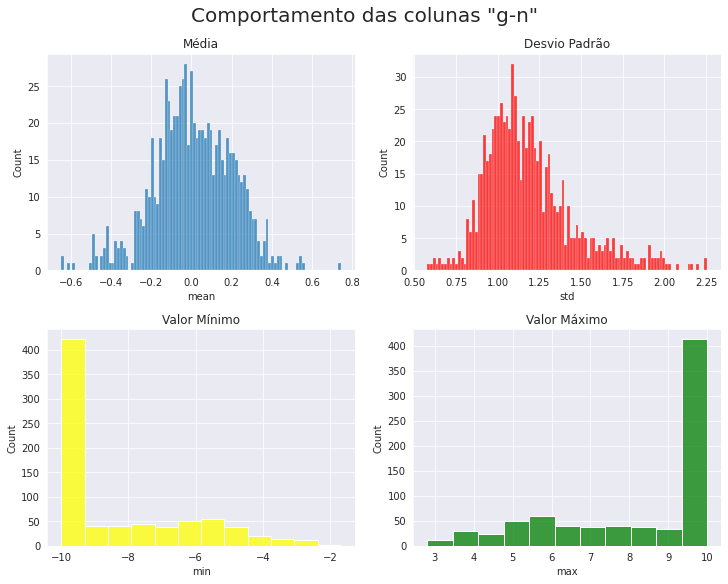

In [18]:
_, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout = True)
_.suptitle('Comportamento das colunas "g-n"', fontsize = 20)

sns.histplot(ax=axes[0][0], x = g_desc['mean'], bins = 100)
axes[0][0].set_title('Média', fontsize = 12)

sns.histplot(ax=axes[0][1], x = g_desc['std'], bins = 100, color = 'red')
axes[0][1].set_title('Desvio Padrão', fontsize = 12)

sns.histplot(ax=axes[1][0], x = g_desc['min'], color = 'yellow')
axes[1][0].set_title('Valor Mínimo', fontsize = 12)

sns.histplot(ax=axes[1][1], x = g_desc['max'], color = 'green')
axes[1][1].set_title('Valor Máximo', fontsize = 12)



Como esperado, a contagem dos valores da média e do desvio padrão definem curvas normais, enquanto os valores mínimos e máximos estão em -10 e 10, respectivamente. Logo, podemos imaginar que as colunas `g-n` apresentam um comportamento de curva normal, isto é, apresentam média 0 e desvio padrão -1.

Vamos agora realizar o mesmo processo com as colunas `c-n`.


In [19]:
c_desc = dados.loc[:, 'c-0': 'c-99'].describe().T
c_desc

,count,mean,std,min,25%,50%,75%,max
c-0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c-1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c-2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c-3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c-4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


Text(0.5, 1.0, 'Valor Máximo')

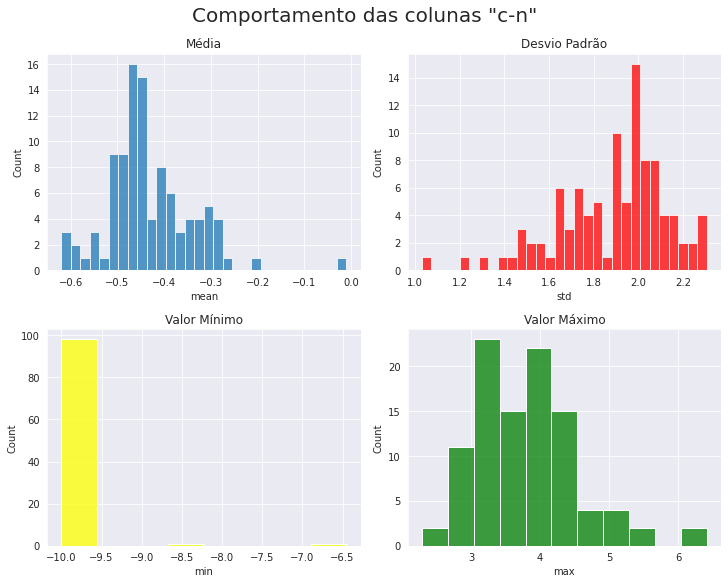

In [20]:
_, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout = True)
_.suptitle('Comportamento das colunas "c-n"', fontsize = 20)

sns.histplot(ax=axes[0][0], x = c_desc['mean'], bins = 30)
axes[0][0].set_title('Média', fontsize = 12)

sns.histplot(ax=axes[0][1], x = c_desc['std'], bins = 30, color = 'red')
axes[0][1].set_title('Desvio Padrão', fontsize = 12)

sns.histplot(ax=axes[1][0], x = c_desc['min'], color = 'yellow')
axes[1][0].set_title('Valor Mínimo', fontsize = 12)

sns.histplot(ax=axes[1][1], x = c_desc['max'], color = 'green')
axes[1][1].set_title('Valor Máximo', fontsize = 12)

Como podemos ver, diferente das colunas `g-n`, não podemos visualizar uma curva normal nas contagens de valores da média e desvio padrão das colunas `c-n`.


#3. Limpeza dos dados

Alguns modelos de Machine Learning são extremamente sensíveis as impurezas (outliers, dados nulos, dados duplicados), então precisamos limpá-los para que nosso modelo tenha uma melhor performance sem que haja um super adequamento (Overfitting) aos dados.




## 3.1 Dados Duplicados

Começaremos a limpar nossos dados removendo duplicatas, pois elas podem ser responsáveis por alterar os valores das estatísticas como média, mediana e desvio padrão. Para isso, basta usar a função **.drop_duplicates()** do pandas e ela removerá todas as linhas em que todas as colunas são iguais:

In [21]:
dados_sem_duplicados = dados.drop_duplicates(keep='last')
print(f'Número de linhas deletadas: {len(dados)-len(dados_sem_duplicados)}.')

Número de linhas deletadas: 0.


O DF original não possui duplicatas.


##3.2 Dados Nulos

Assim como duplicatas, valores nulos podem causar comportamentos irregulares nas estatísticas. Para checar se temos nulos em nosso DF, usaremos a função **.isnull()**:


In [22]:
dados.isnull().values.any()

False

Nossos dados não possuem valores nulos.

##3.3 Outliers

Por fim, precisamos limpar as anomalias, ou outliers, que podem tanto serem causados por errors humanos tanto por causa natural, como é o caso dos nossos dados, já que são resultados de testes de drogas em células. Podemos visualizar os outliers utilizando um **Boxplot** na coluna `g-0`, por exemplo.


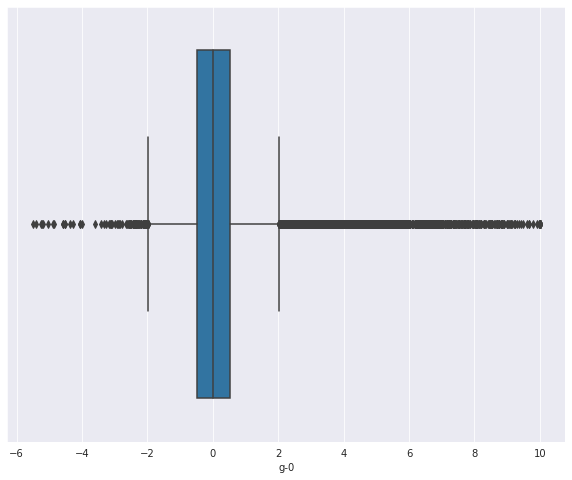

In [23]:
sns.boxplot(data = dados, x = 'g-0')

Nesse gráfico, podemos ver que os valores estão em [-2,2] ,com a média 0. Todos os pontos fora deste intervalo são outliers.

Para identificar e remover alguns destes outliers, nosso primeiro modelo de ML, **IsolationForest**, da biblioteca **Sklearn**. Esse algoritmo não-supervisionado divide os dados aleatoriamente e detecta como outliers os pontos que tiverem menor caminho. Como não queremos retirar nenhum ponto que tenha reultado positivo, vamos aplicar somente nos pontos em que o resultado foi negativo:


In [24]:
from sklearn.ensemble import IsolationForest

outlier_detector = IsolationForest(n_estimators = 70, max_features = 872, random_state = 0)
outlier_detector.fit(dados.loc[:, 'g-0': 'c-99'])

dados['outliers'] = outlier_detector.predict(dados.loc[:, 'g-0': 'c-99'])

dados.drop(dados[dados.rna_polymerase_inhibitor == 0][dados.outliers == -1].index, inplace = True)
dados.drop(columns = 'outliers', inplace = True)
dados.reset_index(drop = True, inplace = True)

dados.shape

(22122, 878)

Comparando os dados, podemos ver que removemos 1692 outliers.





#4. Análise dos dados



##4.1 Relação entre variavéis
Vamos primeiro analisar a relação entre as diferentes variáveis em nossos dados.



###4.1.1 Dose x Tempo x Tratamento

Utilizando a função **.crosstab()** do pandas, é possível gerar uma tabela mostre como os dados estão distribuidos entre as váriaveis `tempo, dose e tratamento`:

In [25]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.162162   0.164315
     48         0.182162   0.180939
     72         0.164324   0.160221
D2   24         0.164324   0.165401
     48         0.162703   0.165499
     72         0.164324   0.163625

É possível ver que a proporção entre controle e com droga está distribuida igualmente entre as categorias.

###4.1.2 Colunas g-n

Vimos na sessão 2.4 que a distribuição das colunas `g-n` são muito similares. Para descobrir se isso ocorre por causa de uma dependência entre elas, por serem variáveis continuas, calcularemos a correlação entre essas variáveis e vizualizaremos utilizando um mapa de calor ou **Heatmap**. A correlação assume valores em um intervalo [-1,1], calculado a partir da covariância entre as variáveis e seus respectivos desvios padrão, sendo que números próximos dos extremos são variávies inversamente (extremo negativo) e diretamente (extremo positivo) proporcionais enquanto próximos de 0 são variáveis independentes. O mapa de calor, por sua vez, é uma tabela que representa seus valores através de uma paleta de cores. Para simplificar os cálculos, vamos utilizar apenas os primeiros 100 valores:


In [26]:
g_corr = dados.loc[:,'g-0':'g-99'].corr()
g_corr.head()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99
g-0,1.000000,0.103739,0.074226,-0.131368,0.114486,-0.055458,0.152534,0.095619,-0.105617,-0.120078,-0.109604,0.029122,0.037410,0.058189,0.006512,-0.204987,-0.116675,0.030189,-0.059574,0.029248,-0.189392,0.204490,0.157858,0.091274,-0.002389,0.004642,-0.127042,-0.049420,-0.025431,-0.029328,-0.105289,0.002574,0.056149,-0.231439,-0.105590,0.210377,0.058415,-0.234794,0.103363,-0.012056,...,-0.144198,0.022689,-0.054401,-0.044678,-0.063328,0.071783,-0.184764,0.007440,-0.018952,0.015974,-0.083968,-0.170986,-0.200829,-0.025675,-0.034731,-0.084582,-0.095264,0.063687,-0.130339,0.044634,0.226296,-0.069234,-0.000271,-0.066938,0.145068,0.120334,0.077535,-0.088516,-0.152265,-0.072264,-0.072639,0.111806,0.127555,-0.039927,0.073561,0.039295,-0.099938,0.209548,-0.158965,0.010624
g-1,0.103739,1.000000,-0.060685,-0.114679,0.207522,-0.131296,-0.115078,0.241219,0.024868,-0.052141,0.017097,0.103925,0.014086,-0.059060,-0.006931,-0.049766,-0.048079,0.023294,-0.064327,-0.048637,-0.192255,0.231481,-0.055454,0.087387,0.083149,-0.060805,-0.030849,0.028480,-0.075517,-0.076144,-0.062261,-0.109100,0.194740,-0.037847,0.005547,0.084931,-0.026748,-0.004508,-0.069317,0.037024,...,-0.014538,0.137044,0.129215,0.142616,0.091582,0.014528,-0.066946,0.041081,0.144040,-0.121256,0.077451,-0.097723,0.026002,0.037688,-0.107990,-0.071319,-0.230220,0.178599,-0.235827,0.016019,-0.023403,-0.057669,-0.049818,-0.086629,-0.040137,-0.063152,0.066404,-0.074676,-0.168428,0.057690,-0.049833,-0.033953,0.124737,-0.177646,0.090976,-0.048147,0.105182,0.037464,0.162889,-0.151269
g-2,0.074226,-0.060685,1.000000,0.020043,-0.074072,0.043909,-0.009744,-0.026167,0.006731,0.012780,0.045076,-0.039670,0.012417,-0.027816,0.039721,-0.032441,-0.045896,0.030103,0.047141,0.020614,0.038923,-0.105267,0.002920,-0.006599,-0.029885,0.023302,-0.040491,0.004627,-0.001258,0.084979,0.002937,0.041505,-0.060106,-0.028196,0.015273,-0.065383,0.066579,-0.036911,0.057538,0.056642,...,0.075370,-0.050199,0.007185,-0.054825,-0.122970,0.006919,0.002088,-0.019358,-0.026601,0.045501,-0.029220,0.020422,-0.043315,0.038382,0.054595,0.002125,0.025425,-0.117718,0.001168,0.082687,-0.040562,0.031142,0.047668,0.021416,0.000408,0.002263,-0.004806,0.056310,0.053955,0.036457,0.053401,-0.013151,-0.020807,0.022643,0.010070,0.019152,0.017577,-0.054198,-0.007422,0.049293
g-3,-0.131368,-0.114679,0.020043,1.000000,-0.075544,0.043871,-0.005713,-0.172714,-0.056640,0.036752,0.039034,0.029182,0.026854,0.015764,0.114924,0.038055,0.082506,-0.003119,0.164427,0.094030,0.171343,-0.142666,0.164911,-0.077710,-0.041564,0.148957,0.161644,0.054896,0.135397,-0.055433,0.096862,0.088365,-0.114737,0.039401,0.096972,-0.045629,-0.129770,-0.128320,0.014013,-0.023539,...,0.050785,-0.034866,-0.011718,-0.126024,-0.067586,0.044706,0.014441,0.026877,-0.076461,0.048262,-0.074966,0.021998,-0.056037,-0.023655,0.070762,0.080949,0.085821,-0.073760,0.193418,-0.014651,-0.032485,-0.017518,0.040193,0.026733,0.041028,-0.007573,-0.092442,0.092710,0.219071,0.006916,0.099508,0.092053,-0.006090,0.216131,-0.158736,-0.026802,-0.080623,-0.075095,-0.079976,0.030549
g-4,0.114486,0.207522,-0.074072,-0.075544,1.000000,0.054056,0.139201,0.336964,-0.231975,-0.092364,-0.299171,0.016602,-0.090398,-0.028801,-0.127275,0.050651,0.029523,-0.225570,-0.027155,-0.031309,-0.139194,0.366818,-0.012177,-0.065533,0.160821,-0.078242,-0.180331,-0.094759,-0.123692,-0.004141,-0.165660,-0.040114,0.212344,-0.087005,0.000287,0.025109,-0.134475,-0.023310,-0.111313,0.065918,...,-0.030577,0.334383,0.012184,0.276004,0.238304,-0.092438,-0.071963,-0.036427,0.149511,-0.050160,0.047186,-0.026438,0.083670,-0.005500,-0.062010,-0.

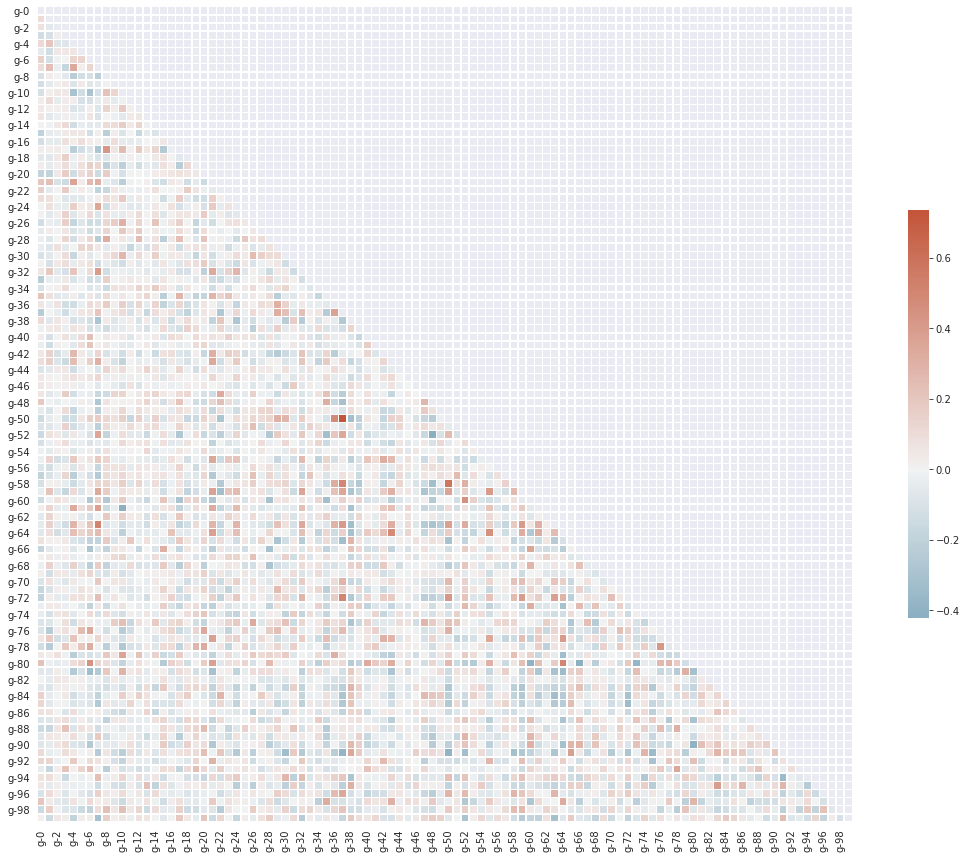

In [27]:
mask = np.triu(np.ones_like(g_corr, dtype=bool))
_, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(g_corr, mask = mask, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws={"shrink": .5})

A correlação entre os diferentes valores está entre -0.4 e 0.4, portanto não há uma dependência muito grande entre eles.


###4.1.3 Colunas c-n

Vamos repetir este processo para as colunas `c-n`:

In [28]:
c_corr = dados.loc[:,'c-0':'c-99'].corr()
c_corr.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
c-0,1.000000,0.383888,0.385772,0.210340,0.395840,0.357039,0.358832,0.282285,0.335655,0.242392,0.411403,0.349893,0.311339,0.398492,0.276634,0.354664,0.148294,0.332146,0.393252,0.235165,0.249208,0.329920,0.371112,0.306055,0.355591,0.353367,0.430634,0.310055,0.325907,0.231602,0.279166,0.407708,0.295343,0.401982,0.395692,0.299256,0.383785,0.284614,0.383910,0.306463,...,0.417188,0.302030,0.389206,0.368202,0.377183,0.362884,0.388640,0.381162,0.295656,0.252114,0.388088,0.315301,0.317744,0.374826,0.190574,0.385431,0.333089,0.267790,0.324323,0.364191,0.352233,0.375974,0.425247,0.371161,0.385778,0.387797,0.317450,0.226200,0.295824,0.250527,0.370629,0.370155,0.327248,0.314254,0.450817,0.290721,0.393523,0.330055,0.319079,0.262703
c-1,0.383888,1.000000,0.595510,0.351865,0.560970,0.535338,0.525371,0.333447,0.509053,0.387658,0.520227,0.570223,0.454158,0.539065,0.366812,0.484408,0.203176,0.373113,0.604392,0.374901,0.327303,0.472934,0.596880,0.407513,0.527586,0.473115,0.608087,0.384651,0.501057,0.268478,0.311920,0.524828,0.386440,0.499591,0.547078,0.380183,0.586944,0.359143,0.615469,0.371814,...,0.527436,0.313611,0.569975,0.578618,0.508422,0.460363,0.493474,0.594699,0.371299,0.346503,0.521997,0.372336,0.458957,0.446077,0.265729,0.537340,0.497417,0.446989,0.410824,0.531962,0.397177,0.615008,0.530940,0.454906,0.610751,0.487487,0.428939,0.332123,0.450362,0.273452,0.524998,0.432798,0.552676,0.431009,0.576824,0.409965,0.501847,0.527403,0.394911,0.326331
c-2,0.385772,0.595510,1.000000,0.382068,0.610267,0.530138,0.569301,0.368629,0.521250,0.381286,0.559045,0.589183,0.482759,0.607977,0.377907,0.525127,0.227371,0.444148,0.624345,0.367680,0.335955,0.513799,0.570212,0.414518,0.538362,0.499181,0.626799,0.435072,0.511549,0.323568,0.393264,0.533015,0.389830,0.549974,0.559582,0.368232,0.580610,0.385218,0.639566,0.406369,...,0.569218,0.346317,0.561548,0.600413,0.518590,0.493461,0.542487,0.582030,0.386273,0.368425,0.515287,0.399704,0.513105,0.527093,0.265910,0.523709,0.478456,0.455023,0.431683,0.544968,0.458019,0.616005,0.563730,0.454908,0.646869,0.489890,0.471410,0.326900,0.453370,0.296313,0.564044,0.481109,0.551343,0.466712,0.603911,0.463683,0.542748,0.497916,0.445323,0.352596
c-3,0.210340,0.351865,0.382068,1.000000,0.412705,0.358447,0.372513,0.200473,0.344401,0.279607,0.343701,0.381308,0.327808,0.367530,0.249357,0.344099,0.146568,0.286977,0.423504,0.239945,0.214067,0.350135,0.386710,0.313914,0.355452,0.375042,0.399487,0.288949,0.357845,0.224184,0.254460,0.385785,0.276194,0.350278,0.347739,0.294037,0.375765,0.256292,0.422762,0.317737,...,0.353476,0.219594,0.393712,0.450842,0.358577,0.309105,0.388354,0.386173,0.258829,0.242070,0.309422,0.278271,0.390397,0.337727,0.188853,0.351822,0.356440,0.345670,0.268687,0.358434,0.311029,0.448278,0.366251,0.292226,0.425735,0.294198,0.318821,0.227814,0.318320,0.221550,0.392637,0.352164,0.387154,0.306008,0.414038,0.306959,0.363731,0.324747,0.289166,0.255843
c-4,0.395840,0.560970,0.610267,0.412705,1.000000,0.568367,0.612673,0.379167,0.532985,0.427836,0.559605,0.615917,0.500573,0.628200,0.412342,0.535007,0.216516,0.486918,0.670662,0.371292,0.332980,0.566066,0.600610,0.491507,0.530790,0.558524,0.646510,0.453627,0.552805,0.311310,0.414013,0.573925,0.399152,0.579914,0.536087,0.419313,0.609146,0.388037,0.649348,0.448020,...,0.576775,0.363540,0.580753,0.648794,0.517140,0.493005,0.595363,0.599477,0.407129,0.379599,0.497953,0.439678,0.511274,0.567779,0.292266,0.536070,0.534947,0.470463,0.441386,0.564185,0.441382,0.654444,0.609831,0.487236,0.645149,0.495394,0.474938,0.303594,0.454933,0.305140,0.587912,0.539265,0.598636,0.484112,0.620640,0.495757,0

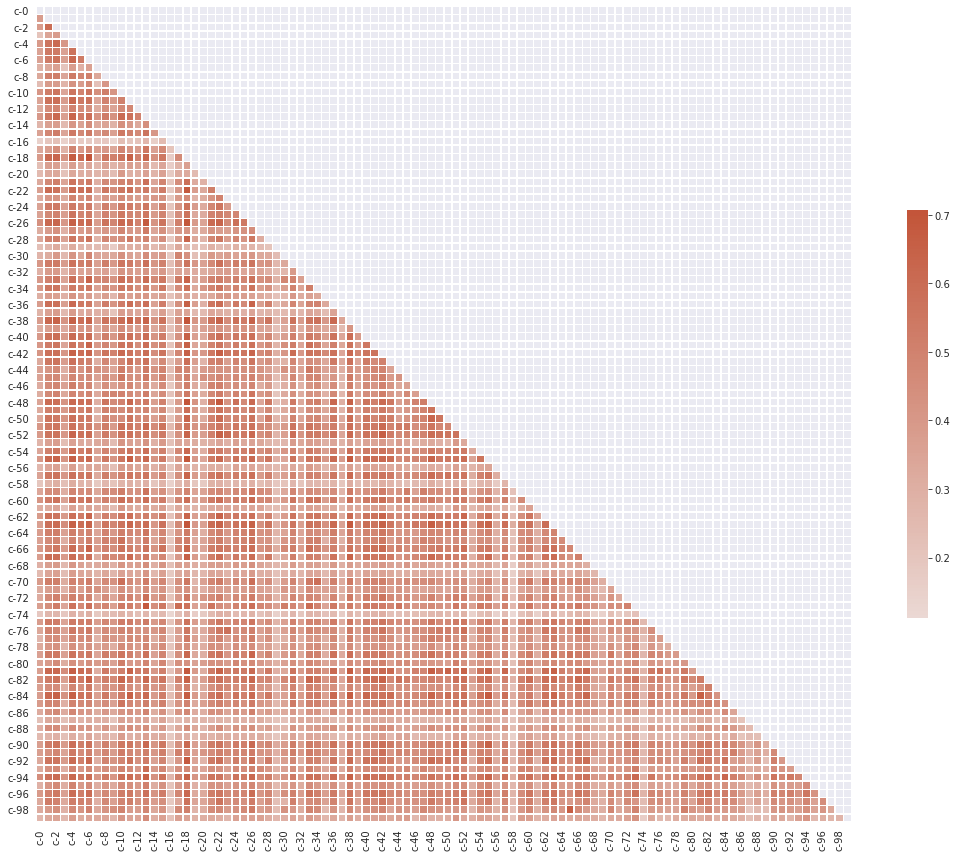

In [29]:
mask = np.triu(np.ones_like(c_corr, dtype=bool))
_, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(c_corr, mask = mask, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws={"shrink": .5})

Como podemos ver, há uma diferença considerável em relação as colunas `g-n`, pois todas os valores possuem uma correlação positiva, superior a 0.1.

> **Importante**: *correlação não necessariamente implica em causualidade. Estamos apenas definindo a relação de uma variável com outra, mas as consequências destas relações são variadas e complexas, necessitando de um estudo mais aprofundado nos genes e células para compreendê-las.*






###4.1.4 Relação g-n e c-n

Tendo em vista que as colunas `g-n` e `c-n` assumem comportamentos diferentes, precisamos analisar suas relações para definir seu impacto nos resto dos dados. Para fazer isso, utilizaremos as 50 últimas colunas de `g-n` (721 - 771) e as 50 primeiras de`c-n` utilizando o método **.loc[ ]** para selecionar as linhas e as colunas:


In [30]:
corr = dados.loc[:,'g-721':'c-50'].corr()
g_c_corr = corr.loc['g-721':'g-771','c-0':'c-50']
g_c_corr.head()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
g-721,-0.125885,-0.195745,-0.180563,-0.138486,-0.209878,-0.215650,-0.214383,-0.087269,-0.179619,-0.177521,-0.164124,-0.189415,-0.157862,-0.174514,-0.161936,-0.144043,-0.036450,-0.123168,-0.235084,-0.127328,-0.110370,-0.178681,-0.218702,-0.240806,-0.163170,-0.178775,-0.202939,-0.124653,-0.194558,-0.084529,-0.130783,-0.168983,-0.131651,-0.178149,-0.162982,-0.119608,-0.192407,-0.083149,-0.211280,-0.146543,-0.204787,-0.178023,-0.225192,-0.186211,-0.135684,-0.158866,-0.166100,-0.168712,-0.213512,-0.216111,-0.232745
g-722,0.031634,0.009923,0.012638,-0.012739,0.023818,-0.003785,-0.059380,0.060591,0.003297,-0.034339,0.047250,0.004398,0.031979,0.053891,0.031039,0.055099,0.040979,0.039350,-0.027274,0.022493,0.057931,0.004361,-0.045792,0.026843,0.000941,0.019369,0.005400,0.068637,-0.024924,0.048682,0.024810,0.027497,0.049773,0.025973,0.010543,0.025416,-0.002772,0.075778,-0.010082,0.019536,-0.004211,-0.009519,0.007321,0.014348,0.071431,0.051014,-0.006821,-0.017406,-0.043029,-0.030609,-0.024918
g-723,-0.145314,-0.266667,-0.248684,-0.198303,-0.288731,-0.281727,-0.345426,-0.131987,-0.282932,-0.343739,-0.217662,-0.273967,-0.212256,-0.291682,-0.222554,-0.231974,-0.071915,-0.252614,-0.362883,-0.229053,-0.166833,-0.291391,-0.300247,-0.217803,-0.287571,-0.268959,-0.329408,-0.222644,-0.332505,-0.098957,-0.230802,-0.256875,-0.141984,-0.271500,-0.242549,-0.128695,-0.260480,-0.110909,-0.317973,-0.218916,-0.256180,-0.270116,-0.311580,-0.221938,-0.231269,-0.260061,-0.214780,-0.332731,-0.323435,-0.327376,-0.319658
g-724,-0.091938,-0.204465,-0.230604,-0.177863,-0.231106,-0.235187,-0.233152,-0.154121,-0.242682,-0.263607,-0.224089,-0.242859,-0.215866,-0.272823,-0.117455,-0.223962,-0.085484,-0.217494,-0.281960,-0.181062,-0.151186,-0.238916,-0.245158,-0.092860,-0.233590,-0.223412,-0.299248,-0.198726,-0.241466,-0.089633,-0.155841,-0.229211,-0.109278,-0.208048,-0.216287,-0.136584,-0.265613,-0.073805,-0.257364,-0.204556,-0.188081,-0.191298,-0.280991,-0.186600,-0.190124,-0.211300,-0.193567,-0.288312,-0.302518,-0.227674,-0.227754
g-725,-0.044578,-0.087729,-0.104819,-0.092184,-0.100818,-0.093128,-0.091075,-0.052874,-0.095069,-0.113553,-0.069644,-0.094092,-0.104803,-0.099633,-0.035039,-0.092804,-0.021936,-0.076240,-0.125575,-0.066567,-0.051026,-0.115984,-0.131872,-0.065905,-0.097755,-0.098919,-0.133079,-0.061382,-0.120010,-0.028244,-0.051861,-0.081827,-0.037520,-0.067075,-0.095525,-0.032700,-0.140389,-0.039974,-0.116443,-0.077914,-0.095091,-0.058313,-0.095536,-0.090006,-0.043619,-0.084095,-0.078372,-0.127575,-0.135057,-0.117487,-0.123572


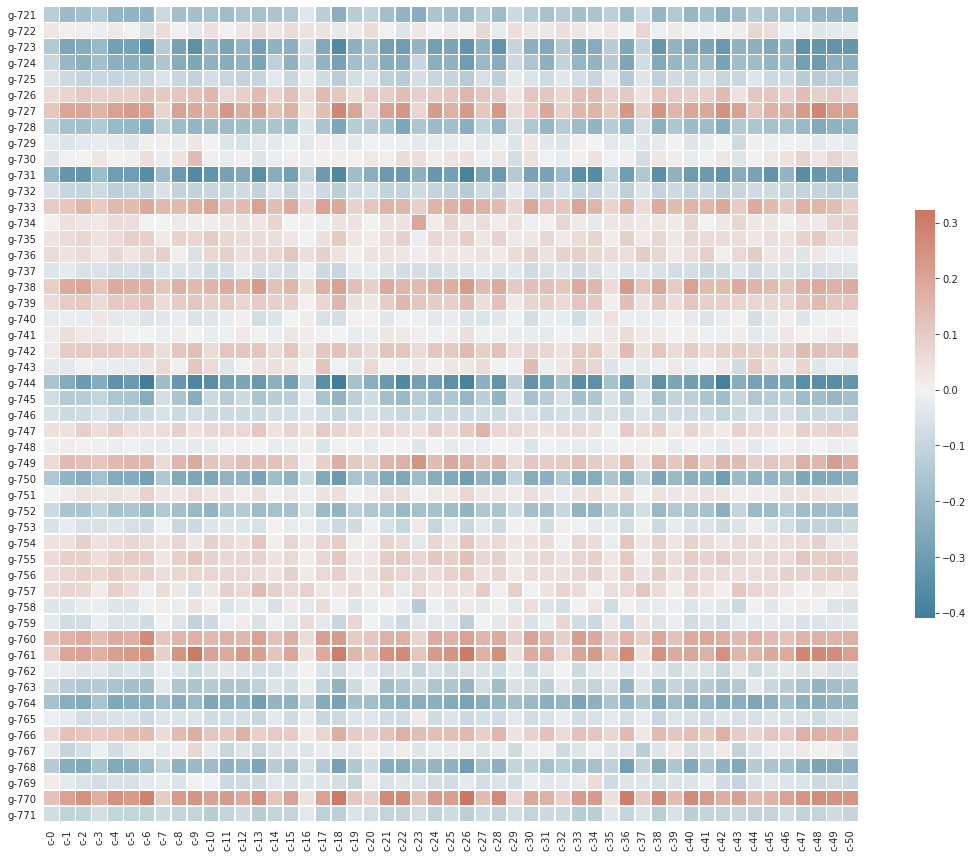

In [31]:
_, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(g_c_corr, cmap = cmap, center = 0, square = True, linewidths = .5, cbar_kws={"shrink": .5})

Como definido na figura, um gene possui uma correlação parecida com todas as células. Isso ocorre pelo fato genes serem segmentos de DNA que contém o código de uma proteína em um ou mais tipos de células do organismos, fazendo com que a resposta do gene à droga seja parecida em grande parte das células.


##4.2 Relação com a variável alvo

Agora que sabemos as relações entre as variáveis, vamos analisar como elas se comportam em relação com o alvo, `rna_polymerase_inhibitor`.



###4.2.1 Dose X Tempo X rna_polymerase_inhibitor

Como se tratam de variáveis categóricas de baixa cardinalidade, podemos utilizar a função **.crosstab()** novamente para analisar de maneira única. Usaremos somente os dados que não foram de controle, já que testes de controle não devem possui essa característica:


In [32]:
com_droga = dados[dados.tratamento == 'com_droga']

pd.crosstab([com_droga['dose'], com_droga['tempo']], dados['rna_polymerase_inhibitor'], normalize='columns')

rna_polymerase_inhibitor         0     1
dose tempo                              
D1   24                   0.164321  0.16
     48                   0.180916  0.20
     72                   0.160221  0.16
D2   24                   0.165407  0.16
     48                   0.165506  0.16
     72                   0.163629  0.16

Como a amostra analisada é muito pequena, não podemos tirar conclusões definitivas sobre os dados, mas superfiicialmente percebemos que há uma distribuição balanceada entre as categorias.


###4.2.2 Relação g-n e rna_polymerase_inhibitor

Para análisar a relação entre os valores `g-n` e nossa variável alvo, usaremos o **.describe()** novamente, porém desta vez separando os dados de acordo com o resultado:


In [33]:
g_desc_0 = dados[dados.rna_polymerase_inhibitor == 0].loc[:, 'g-0': 'g-771'].describe().T
g_desc_0.head()

,count,mean,std,min,25%,50%,75%,max
g-0,22097.0,0.005433,0.837145,-5.513,-0.4993,-0.0596,0.4107,7.095
g-1,22097.0,-0.096499,0.743965,-5.596,-0.5408,-0.0477,0.3839,5.039
g-2,22097.0,0.104498,1.000252,-9.104,-0.4626,0.0340,0.6091,6.226
g-3,22097.0,0.037508,0.767408,-4.927,-0.4180,0.0000,0.4274,10.000
g-4,22097.0,-0.034774,0.857879,-6.369,-0.4863,-0.0575,0.3872,6.511


In [34]:
g_desc_1 = dados[dados.rna_polymerase_inhibitor == 1].loc[:, 'g-0': 'g-771'].describe().T
g_desc_1.head()

,count,mean,std,min,25%,50%,75%,max
g-0,25.0,1.398504,2.794183,-0.6905,-0.2296,0.0967,0.8771,9.1370
g-1,25.0,-0.012664,0.752926,-2.1510,-0.4663,0.1544,0.4511,0.9564
g-2,25.0,0.719024,1.267041,-1.3430,-0.0721,0.6622,1.0300,4.1510
g-3,25.0,-0.213656,1.005590,-3.6590,-0.4939,0.0071,0.4131,1.0580
g-4,25.0,0.943116,1.618908,-1.0310,-0.0544,0.5175,1.0940,5.3850


Text(0.5, 1.0, 'Valor Máximo 1')

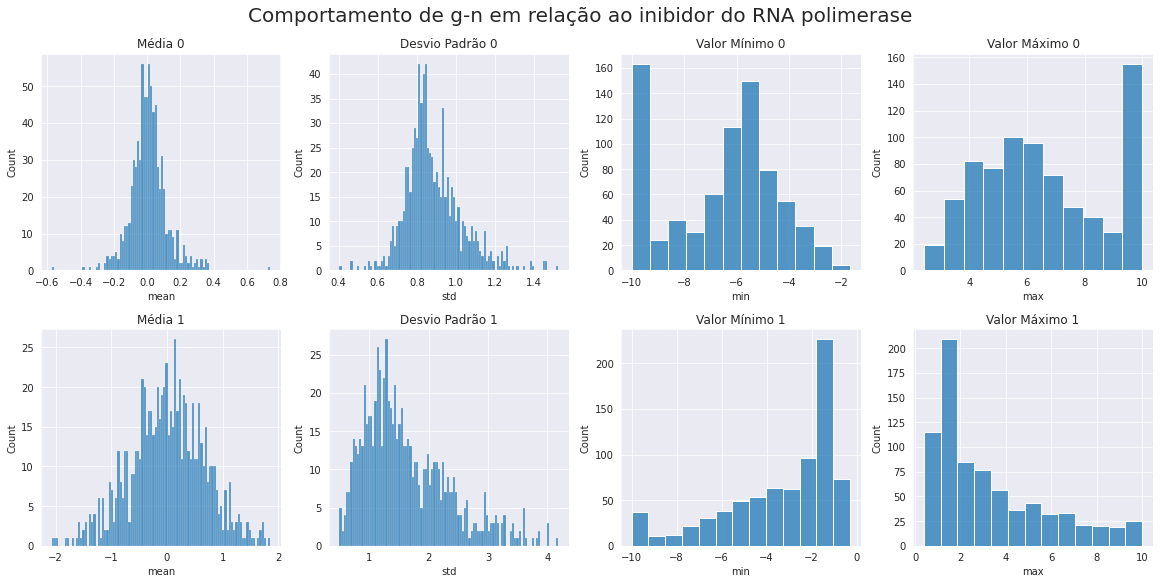

In [35]:
_, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout = True)
_.suptitle('Comportamento de g-n em relação ao inibidor do RNA polimerase', fontsize = 20)

sns.histplot(ax=axes[0][0], x = g_desc_0['mean'], bins = 100)
axes[0][0].set_title('Média 0', fontsize = 12)

sns.histplot(ax=axes[0][1], x = g_desc_0['std'], bins = 100)
axes[0][1].set_title('Desvio Padrão 0', fontsize = 12)

sns.histplot(ax=axes[0][2], x = g_desc_0['min'])
axes[0][2].set_title('Valor Mínimo 0', fontsize = 12)

sns.histplot(ax=axes[0][3], x = g_desc_0['max'])
axes[0][3].set_title('Valor Máximo 0', fontsize = 12)

sns.histplot(ax=axes[1][0], x = g_desc_1['mean'], bins = 100)
axes[1][0].set_title('Média 1', fontsize = 12)

sns.histplot(ax=axes[1][1], x = g_desc_1['std'], bins = 100)
axes[1][1].set_title('Desvio Padrão 1', fontsize = 12)

sns.histplot(ax=axes[1][2], x = g_desc_1['min'])
axes[1][2].set_title('Valor Mínimo 1', fontsize = 12)

sns.histplot(ax=axes[1][3], x = g_desc_1['max'])
axes[1][3].set_title('Valor Máximo 1', fontsize = 12)

Podemos ver no desvio padrão,apesar de ambos se aproximarem de 1, o intervalo dos resultados positivos é bem maior, chegando até 4. Além disso, os valores de mínimo e máximo também são divergentes.


###4.2.3 Relação c-n e rna_polymerase_inhibitor

Repetindo com as colunas `c-n`:


In [36]:
c_desc_0 = dados[dados.rna_polymerase_inhibitor == 0].loc[:, 'c-0': 'c-99'].describe().T
c_desc_0.head()

,count,mean,std,min,25%,50%,75%,max
c-0,22097.0,-0.016270,0.750936,-8.500,-0.4323,0.0440,0.4792,2.989
c-1,22097.0,-0.037424,0.926861,-9.260,-0.4124,0.0642,0.5026,3.763
c-2,22097.0,-0.043544,0.889076,-9.380,-0.4278,0.0534,0.4898,2.831
c-3,22097.0,-0.073046,0.778387,-10.000,-0.4747,0.0162,0.4391,2.408
c-4,22097.0,-0.054017,0.945549,-9.045,-0.4289,0.0640,0.4987,4.555


In [37]:
c_desc_1 = dados[dados.rna_polymerase_inhibitor == 1].loc[:, 'c-0': 'c-99'].describe().T
c_desc_1.head()

,count,mean,std,min,25%,50%,75%,max
c-0,25.0,-0.564292,1.838613,-5.705,-0.7087,0.0431,0.4219,1.5880
c-1,25.0,-1.736760,3.625777,-9.536,-0.9868,-0.0369,0.5280,0.8606
c-2,25.0,-1.319916,3.097851,-8.809,-0.6951,-0.1118,0.4758,0.8226
c-3,25.0,-0.915412,2.089956,-5.975,-1.0400,-0.2110,0.2605,1.4340
c-4,25.0,-1.217004,3.230417,-9.908,-0.6075,0.0328,0.5492,1.2560


Text(0.5, 1.0, 'Valor Máximo 1')

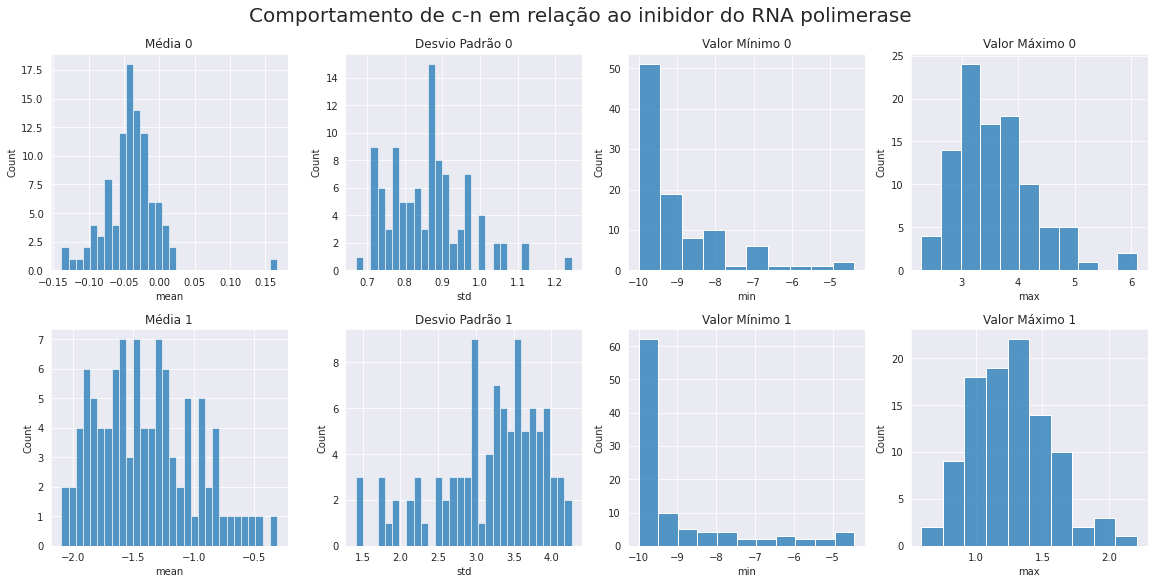

In [38]:
_, axes = plt.subplots(2, 4, figsize=(16, 8), constrained_layout = True)
_.suptitle('Comportamento de c-n em relação ao inibidor do RNA polimerase', fontsize = 20)

sns.histplot(ax=axes[0][0], x = c_desc_0['mean'], bins = 30)
axes[0][0].set_title('Média 0', fontsize = 12)

sns.histplot(ax=axes[0][1], x = c_desc_0['std'], bins = 30)
axes[0][1].set_title('Desvio Padrão 0', fontsize = 12)

sns.histplot(ax=axes[0][2], x = c_desc_0['min'])
axes[0][2].set_title('Valor Mínimo 0', fontsize = 12)

sns.histplot(ax=axes[0][3], x = c_desc_0['max'])
axes[0][3].set_title('Valor Máximo 0', fontsize = 12)

sns.histplot(ax=axes[1][0], x = c_desc_1['mean'], bins = 30)
axes[1][0].set_title('Média 1', fontsize = 12)

sns.histplot(ax=axes[1][1], x = c_desc_1['std'], bins = 30)
axes[1][1].set_title('Desvio Padrão 1', fontsize = 12)

sns.histplot(ax=axes[1][2], x = c_desc_1['min'])
axes[1][2].set_title('Valor Mínimo 1', fontsize = 12)

sns.histplot(ax=axes[1][3], x = c_desc_1['max'])
axes[1][3].set_title('Valor Máximo 1', fontsize = 12)

Percebemos comportamentos diferentes dos genes, assim como era esperado.


# 5. Geração de Features

Agora que filtramos e separamos os dados relevantes, podemos criar nosso modelo para gerar resultados. Primeiramente, vamos definir os valores que serão utilizados para treiná-lo, chamados de **Features**.


##5.1 Features Categóricas

Dados categóricos não podem ser utilizados para treinar o modelo, necessitando de modificões antes de serem inseridos. Usaremos o módulo preprocessing da biblioteca Sklearn para realizar estas manipulações. Não trataremos a coluna `id`, pois ela é somente um identificador do teste.

Começando pela coluna `tratamento`, temos que se trata de um coluna categórica nominal de baixa cardinalidade (não apresenta relação de ordem entre seus valores). Por isso, usaremos a função **.get_dummies()** do pandas para tranformar as variáveis categóricas em indicadoras, representando seus resultados de forma binária (0 ou 1):


In [39]:
dados = dados.join(pd.get_dummies(dados['tratamento'])).drop('tratamento', axis = 1)
dados.head()

,id,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,com_controle,com_droga
0,id_000644bb2,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1
1,id_000779bfc,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1
2,id_000a6266a,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1
3,id_0015fd391,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1
4,id_001626bd3,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1


Apesar da coluna `tempo` apresentar uma relação de ordem, vamos utilizar o mesmo método para gerar 3 colunas indicadoras:

In [40]:
dados = dados.join(pd.get_dummies(dados['tempo'])).drop('tempo', axis = 1)
dados.head()

,id,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,...,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72
0,id_000644bb2,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0
1,id_000779bfc,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1
2,id_000a6266a,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0
3,id_0015fd391,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0
4,id_001626bd3,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1


No caso da coluna `dose`, usaremos a função **sklearn.preprocessing.LabelEncoder()** para gerar apenas uma coluna definindo a numeração da dose:

In [41]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()

dados['dose_num'] = l.fit_transform(dados['dose'])
dados.drop('dose', axis = 1, inplace = True)

dados.head()

,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,...,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72,dose_num
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1,0
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1,1


Para coluna `droga`, usaremos a função **BinaryEncoder() **da biblioteca **Category_encoders**. Por ser uma coluna de alta cardinalidade, se usarmos o **.get_dummies()** iremos gerar mais de 3 mil colunas, enquanto o **BinaryEncoder()** utiliza a codificação binária, reduzindo o total para apenas 12:

In [42]:
import category_encoders as ce

bin = ce.BinaryEncoder(cols = 'droga')

dados = bin.fit_transform(dados)
dados.head()

,id,droga_0,droga_1,droga_2,droga_3,droga_4,droga_5,droga_6,droga_7,droga_8,droga_9,droga_10,droga_11,droga_12,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,...,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,com_controle,com_droga,24,48,72,dose_num
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,...,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,1,1,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,...,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1,0,0,1,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,1,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,...,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,1,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,...,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,1,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,...,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1,0,0,1,1


Depois de todas as modificações, nosso DF apresenta apenas valores numéricos, e está pronto para alimentar nosso modelo.


#6. Seleção de Features

Existe um ditado muito famoso na comunidade de ciêntistas de dados: *Garbage in, garbage out* ou *Entra lixo, sai lixo*. Ou seja, se colocarmos nossos dados sem nenhum planejamento prévio, nossos resultados provavelmente não serão satisfatórios.

Como podemos ver, temos aproximadamente 900 variáveis disponíveis para treinar o modelo. Entretanto, nem todas elas são úteis para gerar resultados. Sendo assim, vamos agora filtrar nossas features para escolher apenas as mais relevantes.



##6.1 Vazamento de Dados

O vazamento de dados ocorre quando uma variável permite queo modelo apenas decore um padrão simples, "trapaceando" na hora de prever resultados. Por exemplo, vimos que nenhum teste de controle recebe o resultado positivo, então se dessemos esse tipo de informação para o, estaríamos arriscando um vazamento de dados. Para evitar isso, vamos remover a coluna `tratamento`.


In [43]:
features = pd.DataFrame(dados.drop(columns = ['com_droga', 'com_controle']))
features.head()

,id,droga_0,droga_1,droga_2,droga_3,droga_4,droga_5,droga_6,droga_7,droga_8,droga_9,droga_10,droga_11,droga_12,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,...,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,24,48,72,dose_num
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,...,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,...,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,1,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,1,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,...,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,...,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,...,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,1,1



##6.2 Alta correlação

Podemos retirar algumas variáveis quando possuem uam correlação próxima dos extremos e que não trazem nenhuma informação. Por exemplo nas colunas "24", "48" e "72" poderiamos retirar uma delas já que podemos representar os 3 estados somente com duas colunas. Retirando a coluna "72", por exemplo, o estado "1 0" representa o tempo "24", o "0 1" representa o tempo de "48" e o estado "0 0" representa o teste de "72":



In [44]:
features = pd.DataFrame(features.drop(columns = 72))
features.head()

,id,droga_0,droga_1,droga_2,droga_3,droga_4,droga_5,droga_6,droga_7,droga_8,droga_9,droga_10,droga_11,droga_12,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,rna_polymerase_inhibitor,24,48,dose_num
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,1,1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,1


**Observação**: *Este resultado também poderia ser obtido utilizando o parâmetro `drop_first = True` na função* **.get_dummies()**. 

##6.3 SelectKBest

Para as colunas continuas, usaremos a função **SelectKbest** e **f_classif** da biblioteca Sklearn.feature_selection para selecionar as 500 das 872 variáveis que possuem mais informação para treinar o modelo:


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

SKBest = SelectKBest(score_func = f_classif, k = 500)

X_treino = pd.DataFrame(SKBest.fit_transform(dados.loc[:, 'g-0': 'c-99'], dados['rna_polymerase_inhibitor']))

X_treino.shape

(22122, 500)

Com todas as variáveis de interesse isoladas, vamos juntar todas elas em um só DF:

In [46]:
features['24h'] = features[24].astype(int)
features['48h'] = features[48].astype(int)
features.drop(columns = [24, 48], inplace = True)
X_treino = pd.concat([X_treino, features.select_dtypes(int)], axis = 1)
X_treino.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,droga_0,droga_1,droga_2,droga_3,droga_4,droga_5,droga_6,droga_7,droga_8,droga_9,droga_10,droga_11,droga_12,rna_polymerase_inhibitor,dose_num,24h,48h
0,1.0620,-0.2479,-0.1944,0.5548,-0.0921,1.1830,-0.4015,0.1789,-0.7969,0.6342,-0.5688,-1.1360,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,0.2198,-0.5055,-0.5119,-0.2162,-0.0347,-0.2566,-0.1143,0.4233,-0.1221,-0.4927,0.4715,-0.0351,-0.1605,0.5790,0.6061,-0.1300,0.6611,-0.3136,-0.4195,0.6551,-0.7395,...,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.0743,0.2991,1.0190,-0.4047,0.8507,-1.1520,0.4590,0.0803,0.5293,0.2839,0.9449,-0.1646,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,-0.2102,0.5300,-0.2568,-0.0455,0.1194,-0.3958,0.2648,-0.8900,1.2730,-0.5036,-0.7339,-0.4283,-0.1231,0.3249,-0.5814,1.7840,-0.1087,1.0350,0.0954,-0.4054,0.1197,...,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.6280,1.5540,-0.0323,0.0065,1.2300,-0.4797,-1.8300,0.6057,0.6042,-0.3075,-0.0799,-0.8181,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,-1.1800,-0.1219,5.4470,1.0310,0.3477,-0.5561,0.1113,0.4552,-0.0978,-0.2661,0.2686,-0.6191,-0.4444,-0.1757,0.5553,0.8346,-0.3334,-0.2933,0.0939,0.5916,0.6809,...,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
3,-0.5138,-0.2656,4.0620,-0.1321,-1.0600,-0.8269,-0.5844,-2.5690,-0.0532,-0.8554,2.1200,-1.1580,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-1.6740,-1.2690,3.0900,-0.3814,-0.7229,-0.0010,-0.1521,0.6636,-2.8230,-0.6035,2.0200,-0.5301,-1.3240,0.0899,0.3936,1.4630,-1.2100,-1.2340,0.1186,1.5370,0.3868,...,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.3254,0.9700,1.4180,-0.8789,0.8630,-0.2219,1.1750,0.2042,0.1244,-1.7090,-0.3330,-0.2685,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,-0.7110,1.0620,0.7888,-0.0848,0.1302,0.1224,1.1140,-0.8147,-0.0803,-0.3818,0.0000,0.1776,1.1320,0.7709,0.7871,1.6410,0.1806,1.3480,0.1255,-0.1556,-0.5436,...,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [47]:
X_treino.shape

(22122, 517)

Com estas modificações, reduzimos nossos dados de 892 variáveis para 517.


#7. Seleção do Modelo

A escolha do modelo certo é uma das etapas mais importantes em qualquer projeto de ML. Existem centenas de modelos diferentes que exercem diversas funções. Nesta sessão, vamos availar diferentes tipos e decidir qual se adéqua melhor ao nosso estudo.



##7.1 Escolha da métrica

Antes de selecionarmos o modelo, precisamos saber como vamos avaliá-lo, pois um método de avaliação falho não escolheria a melhor opção. Começando pelo fato que será um modelo de classifícação, nossas opções variam entre `accuracy, precission e recall `. Porém, temos que levar em consideração os valores da variável alvo, `rna_polymerase_inhibitor` como visto na sessão `2.4`, estão totalmente desbalanceados, com proporção 999:1. Se usarmos a acurácia como método de avaliação e o modelo gerasse 1000 resultados "0", ele teria uma performance de 99.9%, mesmo com um resultado equivocado. Outro ponto, é que no contexto da Drug Discovery, como o percentual de descobrimento é bem baixo, temos que garantir que as drogas que geram resultados positivos sejam realmente potenciais medicações, e vice versa.

Tendo isso em mente, utilizaremos a métrica `f1_score`, calculada a partir da média harmônica entre `precision` e `recall`, balanceando os dois valores:


In [48]:
from sklearn.metrics import f1_score


##7.2 Testando potenciais modelos

Agora que já decidimos nossas variáveis e sistema de avaliação, vamos importar e alimentar modelos que poderiam resolver nosso problema. No conjunto de modelos de classificação, os principais e mais utilizados são `LogisticRegression, SuportVectorMachine, GaussianNB, DecisionTreeClassifier e RandomFlorestClassifier`. Como já comentado, existem centenas de modelos, porém, para este projeto, testaremos apenas os 5 citados acima:


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter = 1000)
svm = SVC()
gs = GaussianNB()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

Para alimentar os modelos, basta utilizar o método **.fit()**. Porém, como temos que testar nossos modelo após o treino, dividiremos nosso conjunto de dados em um dataset de `treino` e em um dataset de `teste`, utilizando a função **StratifiedKFold()** realizar 5 testes e usar a média deles como resultado final. Vamos utilizar o parâmetro `shuffle = True` para garantir a aleatoriedade na seleção, junto com `random_state = 0` para repetir o cálculo com o mesmo conjunto de dados. Para evitar o desbalanceamento das classes, usaremos o `SMOTE` da biblioteca **imbalanced_learn**, que gera pontos da classe menor para diminuir o desbalanceamento.

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy=0.3, random_state = 0)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

In [53]:
X = X_treino.drop(columns = 'rna_polymerase_inhibitor')
y = X_treino['rna_polymerase_inhibitor']

models = [lr, svm, gs, tree, rf]
for model in models:
  scores = []
  for train_index, test_index in skf.split(X_treino,X_treino['rna_polymerase_inhibitor']):
    X_train = X[X.index.isin(train_index)]
    y_train = y[y.index.isin(train_index)]
    X_test = X[X.index.isin(test_index)]
    y_test = y[y.index.isin(test_index)]
    X_train, y_train = over.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores.append(f1_score(y_test, predictions, average = 'macro'))
      
  print(f'O modelo {model} teve um score de {np.mean(scores)} \n \n')

O modelo LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) teve um score de 0.5845391334738561 
 

O modelo SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) teve um score de 0.4997173160823759 
 

O modelo GaussianNB(priors=None, var_smoothing=1e-09) teve um score de 0.49826576369042747 
 

O modelo DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_spli

Como podemos ver, nosso melhor modelo foi o `RandomForest` com um score de 0.627. Vamos utilizá-lo para nossa modelagem final, alterando alguns parâmetros para garantir a máxima performance.


#8. Seleção de Hiperpârametros

*Hiperparâmetros* são os valores que inserimos nos parâmetros do modelo, para que ele tenha um melhor entendimento dos dados e melhor desempenho. Nesta sessão escolheremos os hiperparâmetros do modelo de `RandomFlorest` manualmente para obter o melhor desempenho.



##8.1 n_estimators

O parâmetro `n_estimators` informa o número de árvores que o modelo deve criar, com o padrão sendo 100.

Para escolher o melhor número para esse parâmetro, usaremos a função `validation_curve()` da biblioteca `yellowbrick`, onde será gerado um gráfico de desempenho de acordo com o número de árvores escolhidos:


In [56]:
from yellowbrick.model_selection import validation_curve 

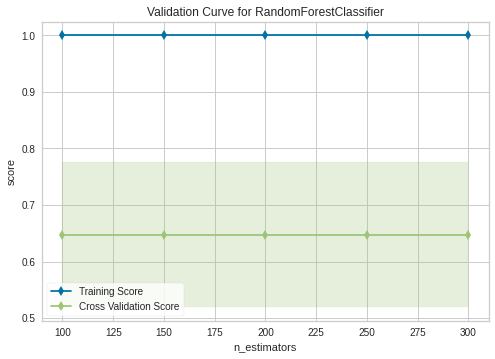

AxesSubplot(0.125,0.125;0.775x0.755)


In [58]:
print(validation_curve(
    rf, X = X, y = y, param_name = "n_estimators", param_range = [100, 150, 200, 250, 300],
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Como obtivemos o mesmo resultado para todos os valores de n_estimators, vamos utilizar o padrão 100.


##8.2 max_depth

Outro parâmetro para alterar é o `max_depth`, que representa a profundidade máxima das árvores do modelo. No caso de avaliação, o parâmetro estava definido em seu caso padrão, `None`, possibilitando o crescimento ilimitado das árvores.


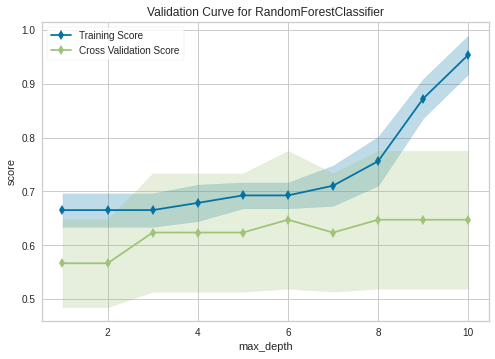

AxesSubplot(0.125,0.125;0.775x0.755)


In [59]:
rf = RandomForestClassifier(n_estimators = 100)

print(validation_curve(
    rf, X = X, y = y, param_name = "max_depth", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Neste caso vamos tomar 6 como o nosso parâmetro. A partir desse valor percebemos uma melhora no resultado dos treinos, mas os resultados permanecem os mesmos, ocorrência do *Overfitting*.


##8.3 min_sample_splits

O terceiro parâmetro que podemos alterar é o  `min_sample_split`, que define o número mínimo da amostra que estará presente em cada divisão, com o padrão sendo 2. Vamos repetir o mesmo processo para determinar o valor que apresenta os melhores resultados:


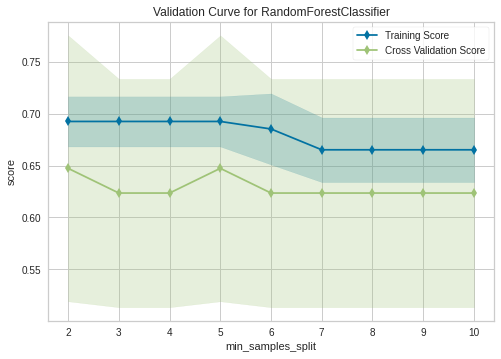

AxesSubplot(0.125,0.125;0.775x0.755)


In [60]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 6)

print(validation_curve(
    rf, X = X, y = y, param_name = "min_samples_split", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Como podemos ver, podemos escolher entre 2 e 5 para ser nosso parâmetro. Como valores maiores tendem a diminuir a performance, vamos manter o número padrão 2.


##8.4 min_sample_leafs

Por fim, o `min_sample_leaf` ajusta o número mínimo de pontos presentes em uma folha, com o padrão sendo 1:


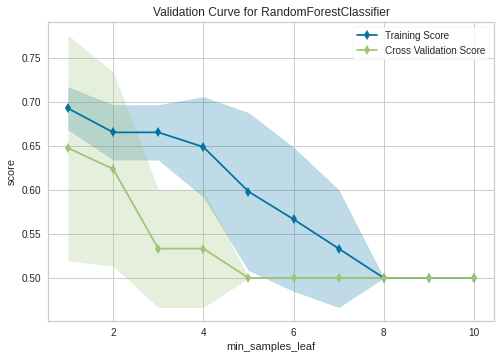

AxesSubplot(0.125,0.125;0.775x0.755)


In [64]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 6, min_samples_split = 2)

print(validation_curve(
    rf, X = X, y = y, param_name = "min_samples_leaf", param_range = np.arange(1, 11),
    scoring = "f1_macro", n_jobs = -1, cv = 5))

Definindo nosso último parâmetro como 1, temos finalmente nosso modelo, com uma performance final de aproximadamente 0.65.


#9. Conclusão

Como apresentado nas sessões, nosso modelo apresenta um f1-score de 0.63, o que é uma performance considerável tomando as proporções de nossa variável alvo. Este modelo ainda pode ser melhorado com uma análise mais aprofundada dos 772 genes e das 100 células, junto com suas diferentes relações. Além disso, poderíamos ajustar outros parâmetros para ver se temos uma melhora na performance.

O objetivo deste projeto, além de criar um modelo funcional para definir se uma droga específica poderia ser útil na luta contra a Tuberculose, foi de demonstrar como o Machine Learning pode auxiliar na prática de Drug Discovery. Os modelos e algoritmos de ML atualmente auxiliam a humanidade realizar tarefas difíceis em diversas áreas de forma simples e automática, propiciando uma nova forma de analisar dados para aqueles que aprendem a utilizá-los.